In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize

In [ ]:
# Fetch Adult dataset
adult = fetch_openml(name='adult', version=1, parser='auto')

# Data (as pandas DataFrame)
data = pd.DataFrame(adult.data, columns=adult.feature_names)
data['income'] = adult.target

In [17]:
# Data Preprocessing
# Fill missing values with the mean for numeric columns
data_numeric = data.select_dtypes(include='number')
data_numeric_filled = data_numeric.fillna(data_numeric.mean())

# Fill missing values with the mode for categorical columns
data_categorical = data.select_dtypes(exclude='number')
data_categorical_filled = data_categorical.apply(lambda x: x.fillna(x.mode()[0]))

# Apply Winsorization to numeric columns
winsor_percentile = 0.05
for col in data_numeric_filled.columns:
    data_numeric_filled[col] = winsorize(data_numeric_filled[col], limits=[winsor_percentile, winsor_percentile])

# Concatenate winsorized numeric columns with categorical columns
data_winsorized = pd.concat([data_numeric_filled, data_categorical_filled], axis=1)

# Encode categorical variables
data_encoded_winsorized = pd.get_dummies(data_winsorized, drop_first=True)

# Split data into features and target variable
X = data_encoded_winsorized.drop('income_>50K', axis=1)
y = data_encoded_winsorized['income_>50K']


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation - Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
nb_pred = nb_model.predict(X_test)

# Model Training and Evaluation - Random Forest Classification
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate model on test set
nb_accuracy_test = accuracy_score(y_test, nb_pred)
nb_report_test = classification_report(y_test, nb_pred, zero_division=0)

rf_accuracy_test = accuracy_score(y_test, rf_pred)
rf_report_test = classification_report(y_test, rf_pred, zero_division=0)

# Print evaluation metrics for test set
print("Naïve Bayes Classifier Performance on Test Set:")
print("Accuracy:", nb_accuracy_test)
print("Classification Report:\n", nb_report_test)

print("\nRandom Forest Classifier Performance on Test Set:")
print("Accuracy:", rf_accuracy_test)
print("Classification Report:\n", rf_report_test)


Naïve Bayes Classifier Performance on Test Set:
Accuracy: 0.7589313133381104
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      7414
           1       0.00      0.00      0.00      2355

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.65      9769


Random Forest Classifier Performance on Test Set:
Accuracy: 0.8260825058859658
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      7414
           1       0.66      0.57      0.61      2355

    accuracy                           0.83      9769
   macro avg       0.77      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769



In [20]:
# Evaluate models using cross-validation
nb_cv_scores_accuracy = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')
rf_cv_scores_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print("\nNaïve Bayes Classifier Cross-Validation Accuracy Scores:")
print(nb_cv_scores_accuracy)
print("Mean Accuracy:", nb_cv_scores_accuracy.mean())

print("\nRandom Forest Classifier Cross-Validation Accuracy Scores:")
print(rf_cv_scores_accuracy)
print("Mean Accuracy:", rf_cv_scores_accuracy.mean())


Naïve Bayes Classifier Cross-Validation Accuracy Scores:
[0.76067151 0.76067151 0.76074939 0.76074939 0.76074939]
Mean Accuracy: 0.7607182362198229

Random Forest Classifier Cross-Validation Accuracy Scores:
[0.82720852 0.82884635 0.83241196 0.82821458 0.8264742 ]
Mean Accuracy: 0.8286311209077102


##Principal Component Analysis(PCA)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data_encoded_winsorized)

df=pd.DataFrame(data=scaled_data, columns= data_encoded_winsorized.columns)

df.describe()


,fnlwgt,education-num,age_1,age_2,age_3,age_4,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
count,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,...,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04
mean,1.192918e-17,-2.123976e-17,-2.909556e-18,-3.840614e-17,-4.102474e-17,1.009616e-16,-5.484514e-17,-2.909556e-19,-6.168259e-17,-5.579074e-17,...,1.527517e-17,-1.163823e-17,2.065785e-17,-2.094881e-17,3.782423e-18,8.728669e-18,-4.440710e-17,-1.716638e-17,1.600256e-17,5.848208e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.600361e+00,-2.183884e+00,-5.933823e-01,-5.692014e-01,-4.523352e-01,-3.829978e-01,-2.619398e-01,-1.431027e-02,-1.739029e+00,-1.896085e-01,...,-6.149386e-02,-2.073988e-02,-4.858074e-02,-3.650473e-02,-2.479119e-02,-2.351826e-02,-3.280344e+00,-4.199864e-02,-2.170548e-02,-5.608450e-01
25%,-7.463874e-01,-4.707160e-01,-5.933823e-01,-5.692014e-01,-4.523352e-01,-3.829978e-01,-2.619398e-01,-1.431027e-02,5.750334e-01,-1.896085e-01,...,-6.149386e-02,-2.073988e-02,-4.858074e-02,-3.650473e-02,-2.479119e-02,-2.351826e-02,3.048461e-01,-4.199864e-02,-2.170548e-02,-5.608450e-01
50%,-8.243260e-02,-4.242407e-02,-5.933823e-01,-5.692014e-01,-4.523352e-01,-3.829978e-01,-2.619398e-01,-1.431027e-02,5.750334e-01,-1.896085e-01,...,-6.149386e-02,-2.073988e-02,-4.858074e-02,-3.650473e-02,-2.479119e-02,-2.351826e-02,3.048461e-01,-4.199864e-02,-2.170548e-02,-5.608450e-01
75%,5.695074e-01,8.141597e-01,1.685254e+00,-5.692014e-01,-4.523352e-01,-3.829978e-01,-2.619398e-01,-1.431027e-02,5.750334e-01,-1.896085e-01,...,-6.149386e-02,-2.073988e-02,-4.858074e-02,-3.650473e-02,-2.479119e-02,-2.351826e-02,3.048461e-01,-4.199864e-02,-2.170548e-02,-5.608450e-01
max,2.123743e+00,1.670744e+00,1.685254e+00,1.756847e+00,2.210750e+00,2.610981e+00,3.817672e+00,6.987990e+01,5.750334e-01,5.274025e+00,...,1.626179e+01,4.821628e+01,2.058429e+01,2.739371e+01,4.033691e+01,4.252015e+01,3.048461e-01,2.381030e+01,4.607131e+01,1.783024e+00


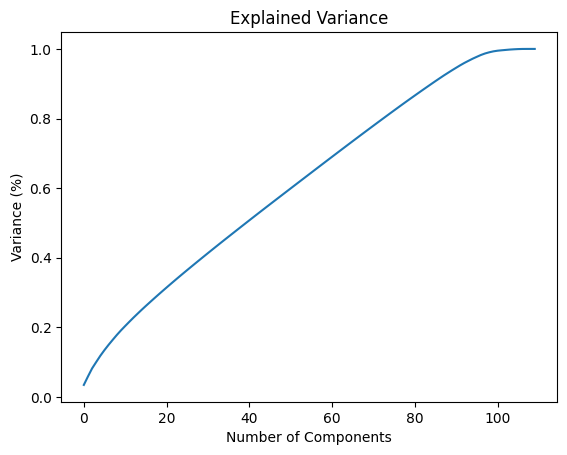

In [23]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()



In [24]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

principal_Df.head()


,principal component 1,principal component 2,principal component 3,principal component 4
0,0.647688,-2.319109,0.126946,0.353663
1,3.068889,-0.233850,-0.252994,-0.159244
2,-1.085870,0.737298,-1.029859,0.174623
3,-1.525178,1.940888,0.493450,1.888711
4,0.033364,0.167196,4.736759,0.649316


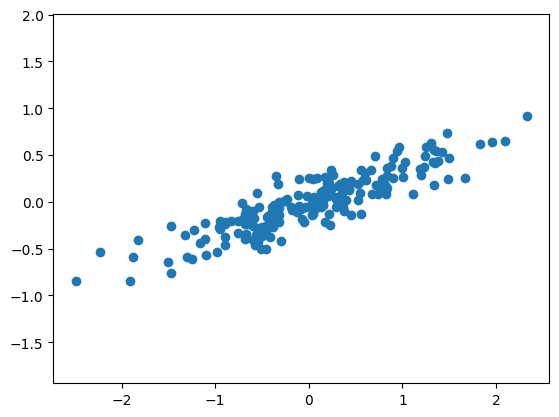

In [25]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');